In [10]:
import torch

model = torch.load('./runs/2025-02-21_20-28-55_convrelu/checkpoints/best_0.9215.pth', weights_only=False)
model = model['model']
model = model.to('cpu')
model.eval()

DASNet(
  (downsample): Sequential(
    (0): STFTDownsample(
      (freq_attention): FreqAttention(
        (max_pool): AdaptiveMaxPool2d(output_size=1)
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (conv): Conv1d(3, 128, kernel_size=(1,), stride=(1,), bias=False)
        (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (fc): Linear(in_features=128, out_features=1, bias=True)
      )
      (conv): Sequential(
        (0): Conv2d(514, 64, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
  )
  (backbone): Sequential(
    (0): InvertedResidualBlock(
      (conv): Sequential(
        (0): Conv2d(64, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
        (3): Conv2d(384, 384, ke

In [11]:
from stft_module import FreqAttention

trained_weights = model.downsample[0].freq_attention.conv.weight
init_weights = FreqAttention(128,1).conv.weight

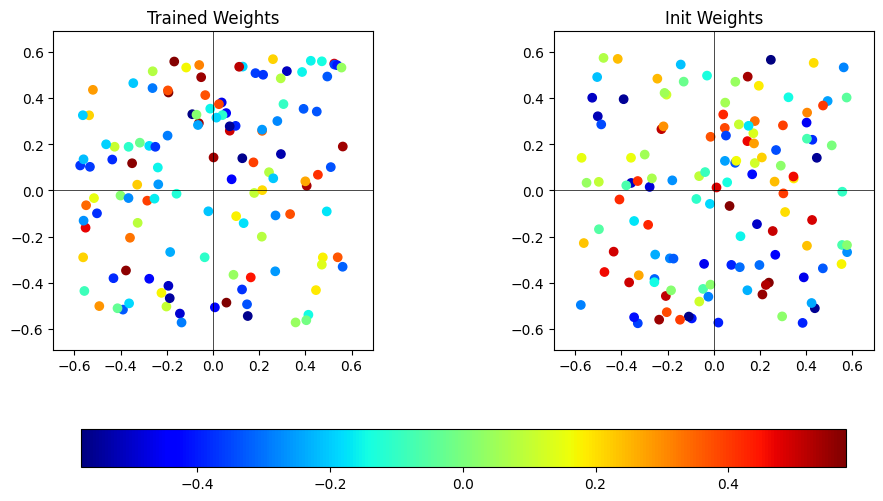

C:\Users\11153\AppData\Local\Temp\ipykernel_34384\1893900433.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


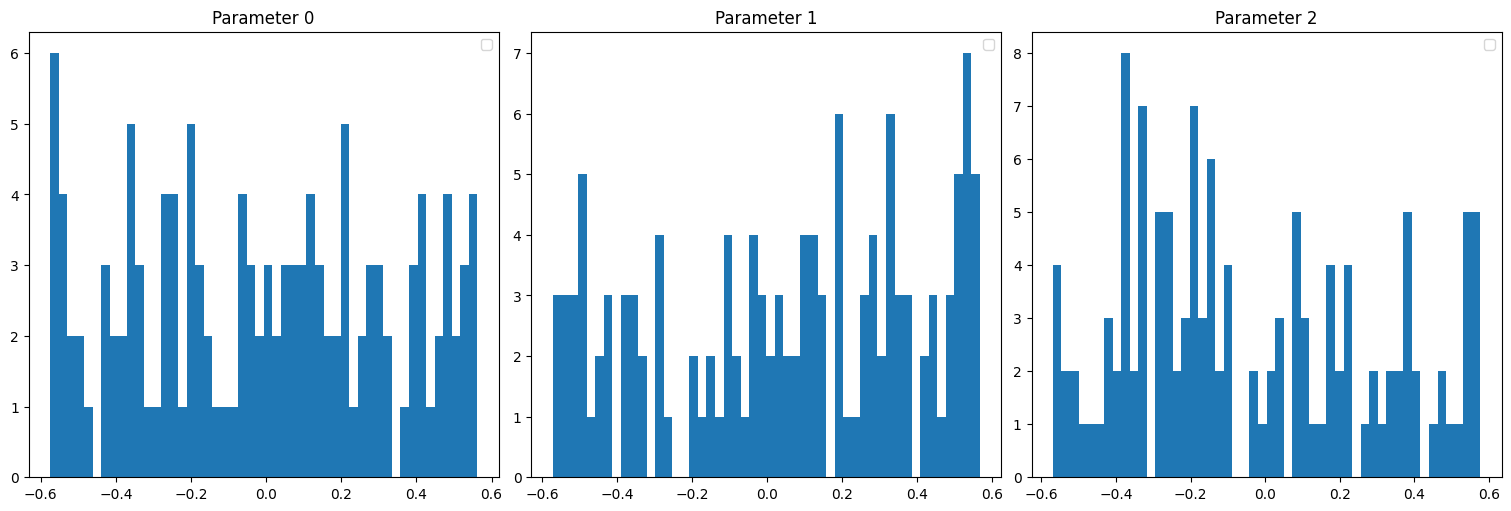

C:\Users\11153\AppData\Local\Temp\ipykernel_34384\1893900433.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


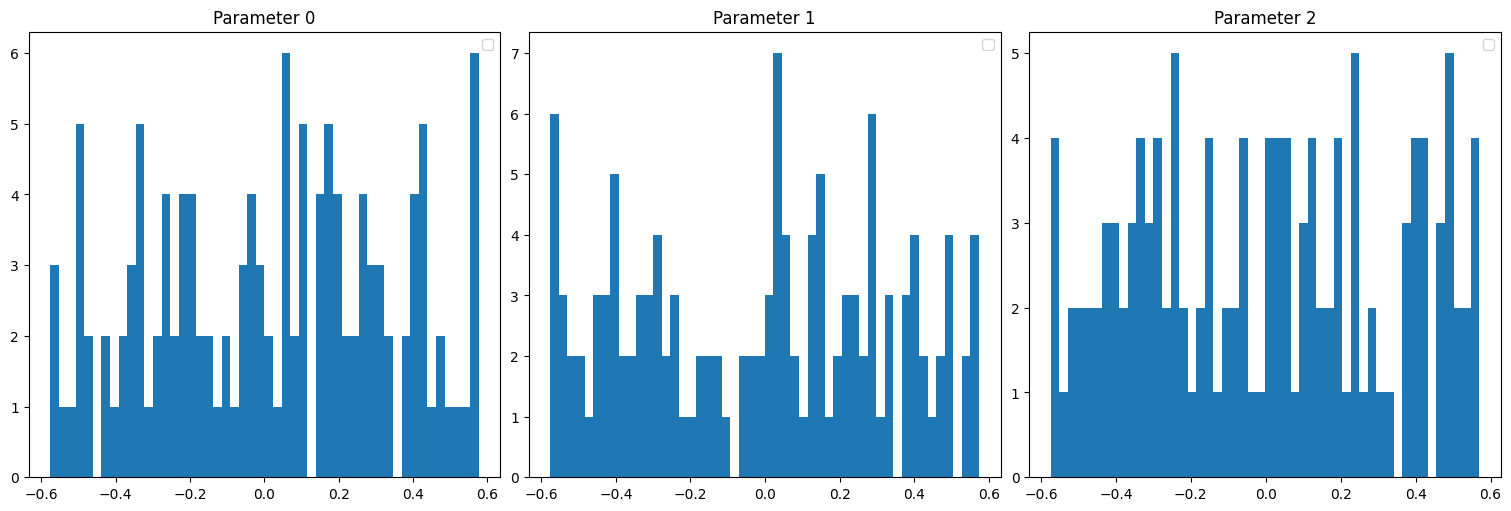

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def show_weights(ax, weights, vmin, vmax, xlim, ylim):
    weights = weights.detach().cpu().numpy()[:, :, 0]
    scatter = ax.scatter(weights[:, 0], weights[:, 1], c=weights[:, 2], cmap='jet', vmin=vmin, vmax=vmax)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_aspect('equal')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return scatter

# 获取数据范围以保证 colorbar 和坐标轴一致
w1 = trained_weights.detach().cpu().numpy()[:, :, 0]
w2 = init_weights.detach().cpu().numpy()[:, :, 0]

vmin = min(w1[:, 2].min(), w2[:, 2].min())
vmax = max(w1[:, 2].max(), w2[:, 2].max())

# 计算 x 和 y 轴范围，并增加 10% 的余量
xmin = min(w1[:, 0].min(), w2[:, 0].min())
xmax = max(w1[:, 0].max(), w2[:, 0].max())
ymin = min(w1[:, 1].min(), w2[:, 1].min())
ymax = max(w1[:, 1].max(), w2[:, 1].max())

x_margin = (xmax - xmin) * 0.1  # 10% 余量
y_margin = (ymax - ymin) * 0.1

xlim = (xmin - x_margin, xmax + x_margin)
ylim = (ymin - y_margin, ymax + y_margin)

# 创建并排的子图
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

sc1 = show_weights(axes[0], trained_weights, vmin, vmax, xlim, ylim)
sc2 = show_weights(axes[1], init_weights, vmin, vmax, xlim, ylim)

axes[0].set_title("Trained Weights")
axes[1].set_title("Init Weights")

# 共享 colorbar，放置在底部
cbar = fig.colorbar(sc1, ax=axes, orientation='horizontal', fraction=0.12, pad=0.15)

plt.show()


# w1 w2的三个参数的数据分布分别可视化
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
for i, ax in enumerate(axes):
    ax.hist(w1[:, i], bins=50)
    ax.set_title(f"Parameter {i}")
    ax.legend()
plt.show()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
for i, ax in enumerate(axes):
    ax.hist(w2[:, i], bins=50)
    ax.set_title(f"Parameter {i}")
    ax.legend()
plt.show()
